In [1]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [2]:
%cd "/gdrive/My Drive/Practice/Grow_More/Iris_data"

/gdrive/My Drive/Practice/Grow_More/Iris_data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data=pd.read_csv("iris_data.txt")
data.to_csv ('/gdrive/My Drive/Practice/Grow_More/iris_data.csv', index=None)

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df=data.copy()

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

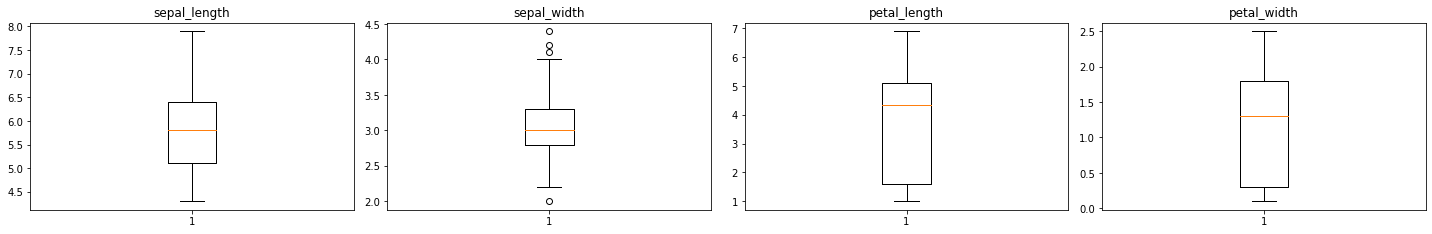

In [12]:
 # Outliers detection using boxplot
plt.figure(figsize=(20,30))
for i, variable in enumerate(df.columns[0:-1]):
  plt.subplot(10,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

Outliers removal


In [13]:
# Here we define a function to find the outliers of a column
def outliers(name):
  z = name.to_list()
  q1 = np.quantile(z,0.25)
  q3 = np.quantile(z,0.75)
  lower = q1 - 1.5*(q3-q1)
  upper = q3 + 1.5*(q3-q1)
  # a['variable'] = a['variable'].clip(lower,upper)
  # then use a for loop as for variable in continuous_data:
  #      outliers(variable)
  return lower,upper

In [14]:
for i in data.columns[0:-1]:
    lower,upper = outliers(df[i])
    df[i]=df[i].clip(lower, upper)

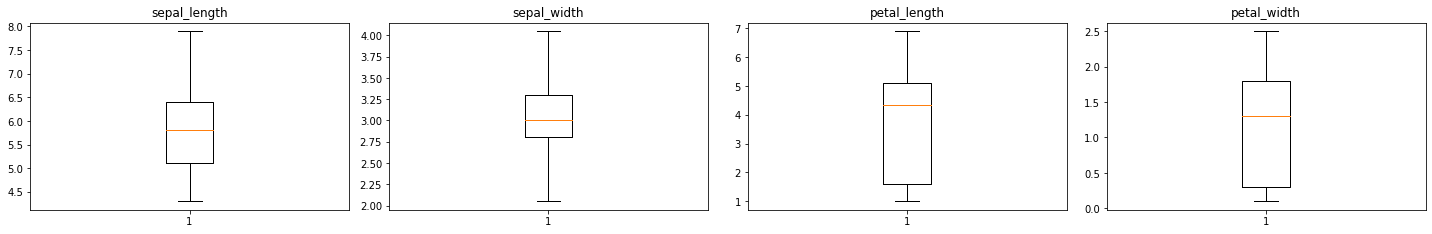

In [15]:
# Outliers detection using boxplot
plt.figure(figsize=(20,30))
for i, variable in enumerate(data.columns[0:-1]):
  plt.subplot(10,4,i+1)
  plt.boxplot(df[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

# **Model Building**

## **Label encoding**
Assigning value to each label so that we can convert categorical column to numeric.

In [16]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['class']= label_encoder.fit_transform(df['class'])
 
df['class'].unique()

array([0, 1, 2])

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## **Splitting data into train and test**

In [18]:
# Defining X and Y variables
X = df.drop(['class'],axis = 1)
Y = df[['class']]
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     class
0        0
1        0
2        0
3        0
4        0
..     ...
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]


In [19]:
print(X.shape)
print(Y.shape)

(150, 4)
(150, 1)


In [20]:
## Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y ,test_size = 0.3, random_state = 50)

In [21]:
x_train.shape

(105, 4)

In [22]:
y_train.shape

(105, 1)

In [23]:
x_test.shape

(45, 4)

In [24]:
y_test.shape

(45, 1)

# **KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test) 
y_pred_train = classifier.predict(x_train)

In [27]:
y_pred

array([1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0,
       2])

In [28]:
y_pred_train

array([0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1,
       0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2,
       2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2])

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))           ##classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.82      0.90        17
           2       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [30]:
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score,roc_auc_score,plot_roc_curve,recall_score, precision_score,f1_score)

In [31]:
print("Recall score (test):",recall_score(y_test,y_pred, average ="micro"))
print("Recall score (train):",recall_score(y_train,y_pred_train,average ="micro"))
print("Precision score (test):",precision_score(y_test, y_pred,average ="micro"))
print("Precision score (train):",precision_score(y_train,y_pred_train,average ="micro"))
print("accuracy score (test):",accuracy_score(y_test, y_pred))
print("accuracy score (train):", accuracy_score(y_train,y_pred_train))
print("f1 score (test):",f1_score(y_test, y_pred,average ="micro"))
print("f1 score (test):",f1_score(y_train,y_pred_train,average ="micro"))

Recall score (test): 0.9333333333333333
Recall score (train): 0.9714285714285714
Precision score (test): 0.9333333333333333
Precision score (train): 0.9714285714285714
accuracy score (test): 0.9333333333333333
accuracy score (train): 0.9714285714285714
f1 score (test): 0.9333333333333333
f1 score (test): 0.9714285714285714


# **Random Forest.**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [34]:
y_pred= rf.predict(x_test) 
y_pred_train = rf.predict(x_train)

In [35]:
confusion_matrix(y_train,y_pred_train)

array([[36,  0,  0],
       [ 0, 33,  0],
       [ 0,  0, 36]])

In [36]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]])

In [37]:
print("Recall score (test):",recall_score(y_test,y_pred, average ="micro"))
print("Recall score (train):",recall_score(y_train,y_pred_train,average ="micro"))
print("Precision score (test):",precision_score(y_test, y_pred,average ="micro"))
print("Precision score (train):",precision_score(y_train,y_pred_train,average ="micro"))
print("accuracy score (test):",accuracy_score(y_test, y_pred))
print("accuracy score (train):", accuracy_score(y_train,y_pred_train))
print("f1 score (test):",f1_score(y_test, y_pred,average ="micro"))
print("f1 score (test):",f1_score(y_train,y_pred_train,average ="micro"))

Recall score (test): 0.9555555555555556
Recall score (train): 1.0
Precision score (test): 0.9555555555555556
Precision score (train): 1.0
accuracy score (test): 0.9555555555555556
accuracy score (train): 1.0
f1 score (test): 0.9555555555555556
f1 score (test): 1.0


# **Conclusion- KNN gave an accuracy of 93.33% and Random forest gave an accuracy 95.55% on test data.**